**Chaper 04**  
Response varibale $Y$ may be *qualitative* but not *quantitative*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

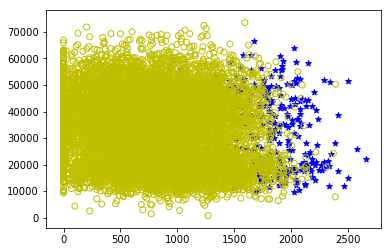

In [2]:
default = pd.read_csv('Default.csv', index_col=0)
group = default.groupby('default')
yes_default = default[default['default'].isin(['Yes'])]
no_default = default[default['default'].isin(['No'])]
yes_balance = yes_default['balance'].values
yes_income = yes_default['income'].values
no_balance = no_default['balance'].values
no_income = no_default['income'].values
plt.scatter(yes_balance, yes_income, c='b', marker='*')
plt.scatter(no_balance, no_income, edgecolor='y',facecolor='none', marker='o' )
plt.show()

# 1 Logistic Regression
## 1.1 Model
To make probability to fall between 0 and 1, we model the $p(X)$ using sigmod function: $f(x)=\frac{e^x}{1+e^x}$. So we extend the linear regression to form this:
$$p(X)=\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}$$
After a bit of manipulation, we conclude that:
$$\frac{p(X)}{1-p(X)}=e^{\beta_0+\beta_1X} \rightarrow log(\frac{p(X)}{1-p(X)}) = \beta_0+\beta_1X$$
We call *log-odds* or *logit* is linear in $X$.
## 1.2 Estimating the regression coefficients
The more general method of *maximum likehood* is preferred.
$$l(\beta_0,\beta_1)=\prod_{i:y_i=1}p(x_i)\prod_{i:y_{i'}=0}\big(1-p(x_{x'})\big)$$

## 1.3 Using Scikit learning

In [4]:
X = default['balance'].values.astype('float')
X = X.reshape((len(X),1))
y = default['default'].values
y = [1 if item=='Yes' else 0 for item in y]
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X,y)
print(lg.coef_, lg.intercept_)

[[ 0.00478248]] [-9.46506555]


# 2 Linear Discriminatnt Analysis
The comparsion of **logistic regression** and **LDA**:

+ The LR's parameters will be unstable when the clases are well-separated, while LDA is not.
+ if $n$ is small and the distribution of predictor $X$ is approximately normal in each of the class, the linear discrimiinat model is again more stable than the LR mdoel
+ LDA is more popular when we want to separate more than two classes.

## 2.1 Bayes's Theorem
Let $\pi_k$ represent the overall or *pripr* probability that a randomly chosen comes fro mthe $k$th class; Let $f_k(X)=Pr(X=x|Y=k)$ denote the *density fucntion* of $X$ for an observation that comes form the $k$th class. 
the *Bayes's theorem* state that:
$$
Pr(Y=k|X=x)=\frac{\pi_kf_k(x)}{\sum_{l=1}^K\pi_lf_l(x)}
$$
We use the abbreviation $P_k(X)=Pr(Y=k|X)$ and refer to $p_k(x)$ as the *posterior* probability that an observation $X=x$ belongs to the $k$th class. We classifiy an observation to the class for which $p_k(X)$ is largest, has the lowest possible error rate out of the all classifiers.

## 2.2 Linear Discriminant Analysis for $p=1$
As we assume that $f_k(x)$ is normal or Gaussian. In the one-dimensional setting, the normal density takes the form:
$$
f_k(x)=\frac{1}{\sqrt{2\pi}\sigma_k}exp(-\frac{1}{2\sigma_k^2(x-\mu_k)^2}
$$
where $\mu_k$ and $\sigma_k^2$ are the mean and variance parametes for the $k$th class. Let us further assume that $\sigma_1^2=\ldots=\sigma_k^2$ which means all $K$ classes share the same variance.
Take the log of and rearrangeing the terms, it is not hard to show that this is the equivalent to assigning the observation to the class for which:
$$
\delta_k(x)=x\times \frac{\mu_k}{\sigma^2} -\frac{\mu_k^2}{2\sigma^2}+log(\pi_k)
$$
is largest. where
$$\hat{\mu_k}=\frac{1}{n_k}\sum_{i:y_i=k}x_i$$
$$\hat{\sigma^2}=\frac{1}{n-K}\sum_{k=1}^K\sum_{i:y_i=k}(x_i-\hat{\mu_k})^2$$

## 2.3 Linear Discriminant Analysis for $p>1$
Extending the LDA classifier to case of the mulitple predictors, we will assume that $X=(X_1, X_2,\ldots,X_p)$ is drawn from the **Multivariate Gaussian** distribution, with a class-specific mean vector and a common convariance matrix.

To indicate that $p-$dimensional random variable $X$ has a multivariate Gaussian distribution, we write $X \sim N(\mu,\Sigma)$. Here $E(X)=\mu$ is mean of $X$,and $Cov(X)=\Sigma$ is $p\times p$ convariance matrix of $X$. Formally, the multivariate Gaussian density is defined as 
$$
f(x)=\frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}}exp\big(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\big)
$$
The Bayes classifier assigns an observation $X=x$ to the class for which
$$
\delta_k(x)=x^T\Sigma^{-1}\mu_k - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + log\pi_k
$$
where $\mu_k$ is a class-specific mean vector and $\Sigma$ is a covariance matrix that is common to all K classes.

## 2.4 Using Scikit Learning

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
incomes = default['income'].values.astype('float')
students = default['student'].values
students = np.array([1.0 if student=='Yes' else 0.0 for student in students])
defaults = default['default'].values
incomes = incomes.reshape((len(incomes),1))
students = students.reshape((len(students),1))
y = [1 if default=='Yes' else 0 for default in defaults]
X = np.hstack((incomes, students))
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)
pred = lda.predict(X)
print(1-accuracy_score(pred, y))

0.0333


# 3 Quadratic Discriminant Analysis

Unlike the LDA, the QDA assumes that each class has its own convariance matrix. That is, it assume that an obserivation from the $k$th class is of the form $X \sim N(\mu_k, \Sigma_k)$, where $\Sigma_k$ is a convariance matrix for $k$th class. Under this assumption, the Bayes classifier assigns an observation $X=x$ to the class for which
$$
\delta_k=-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k) - \frac{1}{2}log|\Sigma_k|+log\pi_k
$$
is largest. The quantity $x$ appears as a *quadratic* function. That is where QDA gets its name.

## 3.1 Comparsion of LDA and QDA
LDA has the bettter variance but suffers from high bias, QDA is vice-versa.

In [21]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X,y)
pred = qda.predict(X)
print(1-accuracy_score(pred, y))

0.0333


# 4 Exercises

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 4.1 Weekly Dataset

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# read data
smarket = pd.read_csv('Weekly.csv',index_col=0)
X = smarket[["Lag1","Lag2","Lag3","Lag4","Lag5","Volume"]].values
y = smarket['Direction'].values
lg = LogisticRegression()
lg.fit(X,y)
down_indice = y=='Down'
up_indice = y=='Up'
X_down = X[down_indice,:]
X_up = X[up_indice,:]
y_down = y[down_indice]
y_up = y[up_indice]
# calculate the confusion matrix
True_Positive = (lg.predict(X_up)==y_up).sum()
False_Negitive = len(y_up) - True_Positive
True_Negitive = (lg.predict(X_down)==y_down).sum()
False_Positive = len(y_down)-True_Negitive
print('TP %d;'%True_Positive, 'FN %d;'%False_Negitive, 'TN %d;'%True_Negitive, 'FP %d'%False_Positive)
print('Overall fraction of correct predictions: %f' % ((True_Positive+True_Negitive)/len(y)))

TP 558; FN 47; TN 55; FP 429
Overall fraction of correct predictions: 0.562902


In [60]:
from sklearn.metrics import confusion_matrix
weekly = pd.read_csv('Weekly.csv',index_col=0)
years = np.arange(1990,2009,1)
weekly_1990_2008 = weekly.ix[weekly['Year'].isin(years)]
weekly_2009_2010 = weekly.ix[weekly['Year'].isin([2009, 2010])]
# prepare the data
train_X = weekly_1990_2008['Lag2'].values
train_X = train_X.reshape((len(train_X),1))
train_y = weekly_1990_2008['Direction'].values
train_y = np.array([1.0 if y=='Up' else 0.0 for y in train_y])
test_X = weekly_2009_2010['Lag2'].values
test_X = test_X.reshape((len(test_X),1))
test_y = weekly_2009_2010['Direction'].values
test_y = np.array([1.0 if y=='Up' else 0.0 for y in test_y])
lg = LogisticRegression()
lg.fit(train_X, train_y)
pred_y = lg.predict(test_X)
confusion_matrix(pred_y, test_y)

array([[ 9,  5],
       [34, 56]])

In [65]:
# using LDA
lda = LinearDiscriminantAnalysis()
lda.fit(train_X, train_y)
pred_y = lda.predict(test_X)
print(confusion_matrix(pred_y, test_y))
print(accuracy_score(pred_y,test_y))

[[ 9  5]
 [34 56]]
0.625


In [66]:
# using QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(train_X, train_y)
pred_y = qda.predict(test_X)
print(confusion_matrix(pred_y, test_y))
print(accuracy_score(pred_y,test_y))

[[ 0  0]
 [43 61]]
0.586538461538


In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(1)
knn.fit(train_X, train_y)
pred = knn.predict(test_X)
print(confusion_matrix(pred, test_y))
print(accuracy_score(pred,test_y))

[[21 31]
 [22 30]]
0.490384615385
